In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Nashville=pd.read_csv("/Users/dhanashreerajendrachavan/Desktop/Northeastern/Quarter 5/ALY 6020/Module 4/Nashville_housing_data.csv")


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
Nashville.head(5)

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [5]:
Nashville.shape

(22651, 26)

In [6]:
Nashville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [7]:
Nashville.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [8]:
# Rows containing duplicate data
duplicate_rows_df = Nashville[Nashville.duplicated()]
print("duplicate rows: ", duplicate_rows_df.shape)

duplicate rows:  (0, 26)


In [9]:
float_columns=['Bedrooms','Full Bath','Half Bath']


In [10]:
for i in float_columns:
 
 print(Nashville[i].value_counts())
 print("\n")

3.0     12273
4.0      4646
2.0      4577
5.0       820
6.0       194
1.0        79
7.0        29
8.0        21
0.0         4
9.0         2
10.0        2
11.0        1
Name: Bedrooms, dtype: int64


2.0     9263
1.0     8906
3.0     3137
4.0      921
5.0      304
6.0       80
7.0       15
0.0       11
8.0        6
10.0       4
9.0        3
Name: Full Bath, dtype: int64


0.0    16804
1.0     5409
2.0      307
3.0       23
Name: Half Bath, dtype: int64




In [11]:
cat_columns=['Land Use','Property City','Sold As Vacant','Multiple Parcels Involved in Sale','City','State','Tax District','Foundation Type','Exterior Wall','Grade','Sale Price Compared To Value']


In [12]:
cat_columns

['Land Use',
 'Property City',
 'Sold As Vacant',
 'Multiple Parcels Involved in Sale',
 'City',
 'State',
 'Tax District',
 'Foundation Type',
 'Exterior Wall',
 'Grade',
 'Sale Price Compared To Value']

In [13]:
for i in cat_columns:
 
 print(Nashville[i].value_counts())
 print("\n")

SINGLE FAMILY             21390
DUPLEX                     1190
RESIDENTIAL COMBO/MISC       37
QUADPLEX                     34
Name: Land Use, dtype: int64


NASHVILLE         18010
MADISON            1146
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         824
GOODLETTSVILLE      435
BRENTWOOD           158
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: Property City, dtype: int64


No     22517
Yes      134
Name: Sold As Vacant, dtype: int64


No     22183
Yes      468
Name: Multiple Parcels Involved in Sale, dtype: int64


NASHVILLE         18013
MADISON            1146
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         824
GOODLETTSVILLE      435
BRENTWOOD           157
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: City, dtype: int64


TN    22651
Name: State, dtype: int64


URBAN SERVICES DISTRICT      17497
GENERAL SERVICES DISTRICT     3881
CITY OF OAK HILL               349
CITY OF 

In [14]:
Nashville['Tax District'].value_counts()

URBAN SERVICES DISTRICT      17497
GENERAL SERVICES DISTRICT     3881
CITY OF OAK HILL               349
CITY OF FOREST HILLS           345
CITY OF GOODLETTSVILLE         344
CITY OF BELLE MEADE            214
CITY OF BERRY HILL              21
Name: Tax District, dtype: int64

In [15]:
Nashville['State'].value_counts()

TN    22651
Name: State, dtype: int64

In [16]:
Nashville.shape

(22651, 26)

In [17]:
Nashville.drop(['Unnamed: 0','Parcel ID','Property Address','Suite/ Condo   #','Legal Reference','State','Property City'], axis=1, inplace= True)


In [18]:
Nashville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           22651 non-null  object 
 1   Sale Date                          22651 non-null  object 
 2   Sold As Vacant                     22651 non-null  object 
 3   Multiple Parcels Involved in Sale  22651 non-null  object 
 4   City                               22651 non-null  object 
 5   Acreage                            22651 non-null  float64
 6   Tax District                       22651 non-null  object 
 7   Neighborhood                       22651 non-null  int64  
 8   Land Value                         22651 non-null  int64  
 9   Building Value                     22651 non-null  int64  
 10  Finished Area                      22650 non-null  float64
 11  Foundation Type                    22650 non-null  obj

In [19]:
Nashville['Finished Area']=Nashville['Finished Area'].fillna(Nashville['Finished Area'].mean())


In [20]:
Nashville['Foundation Type'].fillna(Nashville['Foundation Type'].mode()[0], inplace=True)


In [21]:
Nashville['Bedrooms']=Nashville['Bedrooms'].fillna(Nashville['Bedrooms'].mean())


In [22]:
Nashville['Full Bath']=Nashville['Full Bath'].fillna(Nashville['Full Bath'].mean())


In [23]:
Nashville['Half Bath']=Nashville['Half Bath'].fillna(Nashville['Half Bath'].mean())

In [24]:
for i in float_columns:
 
 Nashville[i] = Nashville[i].fillna(0)
 Nashville[i]=Nashville[i].astype(int)


## Outlier Treatment

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warn

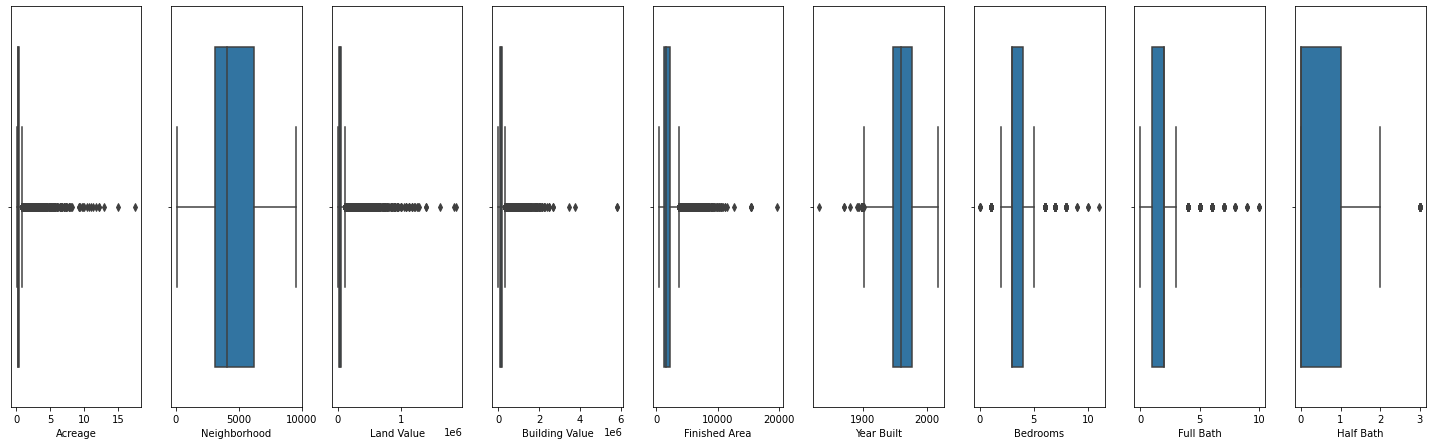

In [25]:
#### Plotting box plot to check the outliers
plt.figure(figsize=(20, 12))
columns = ['Acreage', 'Neighborhood', 'Land Value', 'Building Value', 'Finished Area','Year Built', 'Bedrooms','Full Bath','Half Bath']
for i in range(9):
    plt.subplot(2, 9, i+1)
    sns.boxplot(Nashville[columns[i]], orient="v")
    
plt.tight_layout()

#There are very few ouliers present in the dataset which are very nearer to upper boundary. So, there is no need of outliers treatment

In [26]:
Nashville.describe()

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,22651.000000,22651.000000,2.265100e+04,2.265100e+04,22651.000000,22651.000000,22651.000000,22651.000000,22651.000000
mean,0.454705,4432.715024,7.013797e+04,1.722402e+05,1915.377151,1961.947684,3.104896,1.887246,0.268951
std,0.611818,2142.803595,1.029035e+05,1.896424e+05,1079.070700,25.843908,0.829233,0.951217,0.479401
min,0.040000,107.000000,9.000000e+02,1.400000e+03,450.000000,1832.000000,0.000000,0.000000,0.000000
25%,0.200000,3130.000000,2.200000e+04,8.550000e+04,1250.000000,1947.000000,3.000000,1.000000,0.000000
50%,0.280000,4026.000000,3.000000e+04,1.188000e+05,1646.000000,1959.000000,3.000000,2.000000,0.000000
75%,0.460000,6229.000000,6.030000e+04,1.882500e+05,2213.250000,1977.000000,4.000000,2.000000,1.000000
max,17.500000,9530.000000,1.869000e+06,5.824300e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000


In [27]:
Nashville['Year Built'].value_counts()

1950    1147
1955     997
1930     996
1960     748
1940     744
2015     564
1920     559
1948     538
1958     530
1956     468
1962     442
2014     426
1963     425
2016     419
1935     417
1959     409
1945     390
1965     379
1961     377
1957     360
1964     353
1966     334
1968     321
1953     321
1954     311
1967     294
1972     293
1952     290
1951     275
1949     258
1925     250
1971     243
1987     240
2013     232
1928     228
1973     221
1969     215
1984     215
1979     213
1978     203
1983     197
1938     194
1947     193
1970     189
1977     188
1974     176
1946     176
1985     175
1986     175
1988     166
1976     159
1910     154
1980     149
1997     133
1989     132
1999     121
1975     112
1981     106
2006     105
2007     104
2000      97
1991      95
2005      94
1990      91
1996      90
1899      89
1929      89
1936      88
1942      88
1941      88
1998      86
2004      81
1924      78
1995      78
1993      78
1939      76
1994      74

In [28]:
# https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [29]:
print(Nashville['Finished Area'].quantile(0.10))
print(Nashville['Finished Area'].quantile(0.90))

988.0
3096.39999


In [30]:
Nashville['Finished Area'] = np.where(Nashville['Finished Area'] <988.0, 988.0,Nashville['Finished Area'])
Nashville['Finished Area'] = np.where(Nashville['Finished Area'] >3096.39999, 3096.39999,Nashville['Finished Area'])
print(Nashville['Finished Area'].skew())

0.6518632376230338


In [31]:
print(Nashville['Building Value'].quantile(0.10))
print(Nashville['Building Value'].quantile(0.90))

62300.0
308300.0


In [32]:
Nashville['Building Value'] = np.where(Nashville['Building Value'] <62300.0, 62300.0,Nashville['Building Value'])
Nashville['Building Value'] = np.where(Nashville['Building Value'] >308300.0, 308300.0,Nashville['Building Value'])
print(Nashville['Building Value'].skew())

0.9364469724227075


In [33]:
print(Nashville['Land Value'].quantile(0.10))
print(Nashville['Land Value'].quantile(0.90))

16500.0
195000.0


In [34]:
Nashville['Land Value'] = np.where(Nashville['Land Value'] <16500.0, 16500.0,Nashville['Land Value'])
Nashville['Land Value'] = np.where(Nashville['Land Value'] >195000.0, 195000.0,Nashville['Land Value'])
print(Nashville['Land Value'].skew())

1.4887731008853655


In [35]:
# Q1 = Nashville['Acreage'].quantile(0.25)
# Q3 = Nashville['Acreage'].quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [36]:
# Nashville['Acreage']=Nashville['Acreage'][~((Nashville['Acreage'] < (Q1 - 1.5 * IQR)) |(Nashville['Acreage'] > (Q3 + 1.5 * IQR)))]

In [37]:
Nashville.head(5)

,Land Use,Sale Date,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,1/11/2013,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127,32000.0,134400.0,1149.00000,PT BSMT,1941,BRICK,C,2,1,0,Over
1,SINGLE FAMILY,1/18/2013,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126,34000.0,157800.0,2090.82495,SLAB,2000,BRICK/FRAME,C,3,2,1,Over
2,SINGLE FAMILY,1/18/2013,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000.0,243700.0,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4,2,0,Under
3,SINGLE FAMILY,1/23/2013,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130,25000.0,138100.0,1969.00000,CRAWL,1910,FRAME,C,2,1,0,Under
4,SINGLE FAMILY,1/4/2013,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000.0,86100.0,1037.00000,CRAWL,1945,FRAME,C,2,1,0,Under


In [38]:
Nashville[['Sale Date']] = Nashville[['Sale Date']].apply(pd.to_datetime)


In [39]:
import datetime

today=datetime.datetime.today()

today

datetime.datetime(2021, 8, 10, 2, 32, 48, 691615)

In [40]:
Nashville['Sales days'] = (pd.Timestamp('today') - Nashville['Sale Date']).dt.days

In [41]:
Nashville.head(5)

,Land Use,Sale Date,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Sales days
0,SINGLE FAMILY,2013-01-11,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127,32000.0,134400.0,1149.00000,PT BSMT,1941,BRICK,C,2,1,0,Over,3133
1,SINGLE FAMILY,2013-01-18,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126,34000.0,157800.0,2090.82495,SLAB,2000,BRICK/FRAME,C,3,2,1,Over,3126
2,SINGLE FAMILY,2013-01-18,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000.0,243700.0,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4,2,0,Under,3126
3,SINGLE FAMILY,2013-01-23,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130,25000.0,138100.0,1969.00000,CRAWL,1910,FRAME,C,2,1,0,Under,3121
4,SINGLE FAMILY,2013-01-04,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000.0,86100.0,1037.00000,CRAWL,1945,FRAME,C,2,1,0,Under,3140


In [42]:
Nashville['DiffYearsBuilt']=2021-Nashville['Year Built']

In [43]:
Nashville.drop(['Sale Date','Year Built'], axis=1, inplace= True)


In [44]:
Nashville.head(5)

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Sales days,DiffYearsBuilt
0,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127,32000.0,134400.0,1149.00000,PT BSMT,BRICK,C,2,1,0,Over,3133,80
1,SINGLE FAMILY,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126,34000.0,157800.0,2090.82495,SLAB,BRICK/FRAME,C,3,2,1,Over,3126,21
2,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000.0,243700.0,2145.60001,FULL BSMT,BRICK/FRAME,B,4,2,0,Under,3126,73
3,SINGLE FAMILY,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130,25000.0,138100.0,1969.00000,CRAWL,FRAME,C,2,1,0,Under,3121,111
4,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000.0,86100.0,1037.00000,CRAWL,FRAME,C,2,1,0,Under,3140,76


In [45]:
Nashville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           22651 non-null  object 
 1   Sold As Vacant                     22651 non-null  object 
 2   Multiple Parcels Involved in Sale  22651 non-null  object 
 3   City                               22651 non-null  object 
 4   Acreage                            22651 non-null  float64
 5   Tax District                       22651 non-null  object 
 6   Neighborhood                       22651 non-null  int64  
 7   Land Value                         22651 non-null  float64
 8   Building Value                     22651 non-null  float64
 9   Finished Area                      22651 non-null  float64
 10  Foundation Type                    22651 non-null  object 
 11  Exterior Wall                      22651 non-null  obj

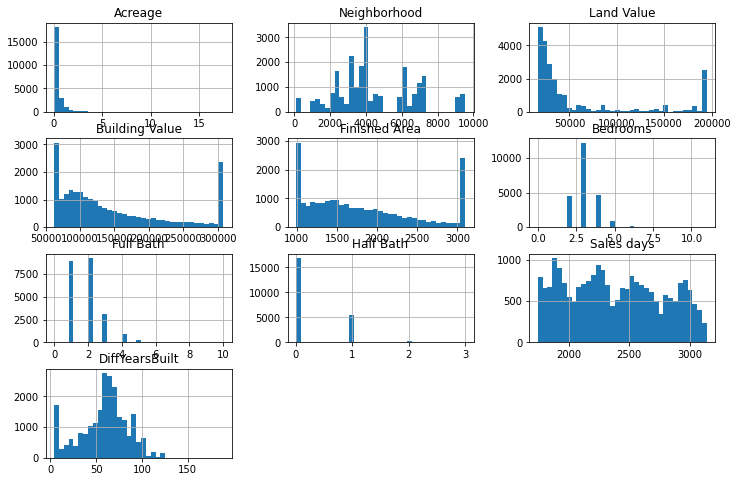

In [46]:
# let's visualize the distribution of the features of the cars
Nashville.hist(figsize=(12,8),bins=35)
plt.show()

In [47]:
# Nashville = pd.get_dummies(Nashville, columns=['Land Use','Sold As Vacant','Multiple Parcels Involved in Sale','City','Tax District','Foundation Type','Exterior Wall','Grade'])


In [48]:
# from sklearn.preprocessing import LabelEncoder

# Nashville['Land Use'] = Nashville['Land Use'].astype('category')
# Nashville['Land Use'] = Nashville['Land Use'].cat.codes

# Nashville['Sold As Vacant'] = Nashville['Sold As Vacant'].astype('category')
# Nashville['Sold As Vacant'] = Nashville['Sold As Vacant'].cat.codes

# Nashville['Multiple Parcels Involved in Sale'] = Nashville['Multiple Parcels Involved in Sale'].astype('category')
# Nashville['Multiple Parcels Involved in Sale'] = Nashville['Multiple Parcels Involved in Sale'].cat.codes

# Nashville['City'] = Nashville['City'].astype('category')
# Nashville['City'] = Nashville['City'].cat.codes

# Nashville['Tax District'] = Nashville['Tax District'].astype('category')
# Nashville['Tax District'] = Nashville['Tax District'].cat.codes

# Nashville['Foundation Type'] = Nashville['Foundation Type'].astype('category')
# Nashville['Foundation Type'] = Nashville['Foundation Type'].cat.codes

# Nashville['Exterior Wall'] = Nashville['Exterior Wall'].astype('category')
# Nashville['Exterior Wall'] = Nashville['Exterior Wall'].cat.codes

# Nashville['Grade'] = Nashville['Grade'].astype('category')
# Nashville['Grade'] = Nashville['Grade'].cat.codes

In [49]:
categorical_variable = {variable:i for i, variable in enumerate(Nashville.stack().unique())}

Nashville['Land Use'] = Nashville['Land Use'].map(categorical_variable)
Nashville['Sold As Vacant'] = Nashville['Sold As Vacant'].map(categorical_variable)
Nashville['Multiple Parcels Involved in Sale'] = Nashville['Multiple Parcels Involved in Sale'].map(categorical_variable)
Nashville['City'] = Nashville['City'].map(categorical_variable)
Nashville['Tax District'] = Nashville['Tax District'].map(categorical_variable)
Nashville['Foundation Type'] = Nashville['Foundation Type'].map(categorical_variable)
Nashville['Exterior Wall'] = Nashville['Exterior Wall'].map(categorical_variable)
Nashville['Grade'] = Nashville['Grade'].map(categorical_variable)

In [50]:
Nashville.head(5)

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Sales days,DiffYearsBuilt
0,0,1,1,2,0.17,4,3127,32000.0,134400.0,1149.00000,9,10,11,2,1,0,Over,3133,80
1,0,1,1,2,0.11,19,9126,34000.0,157800.0,2090.82495,24,25,11,3,2,1,Over,3126,21
2,0,1,1,2,0.17,4,3130,25000.0,243700.0,2145.60001,33,25,34,4,2,0,Under,3126,73
3,0,1,1,2,0.34,4,3130,25000.0,138100.0,1969.00000,41,42,11,2,1,0,Under,3121,111
4,0,1,1,2,0.17,4,3130,25000.0,86100.0,1037.00000,41,42,11,2,1,0,Under,3140,76


In [51]:
# uint_col=list(Nashville.select_dtypes(['uint8']).columns)


In [52]:
# for i in uint_col:
#     Nashville[i]=Nashville[i].astype('int64')

In [53]:
# Nashville.head(5)

In [54]:
Nashville['Sale Price Compared To Value']=Nashville['Sale Price Compared To Value'].map(dict(Over=1, Under=0))


In [55]:
X = Nashville.drop(columns='Sale Price Compared To Value')
y = Nashville['Sale Price Compared To Value']

In [56]:
X.head(5)

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sales days,DiffYearsBuilt
0,0,1,1,2,0.17,4,3127,32000.0,134400.0,1149.00000,9,10,11,2,1,0,3133,80
1,0,1,1,2,0.11,19,9126,34000.0,157800.0,2090.82495,24,25,11,3,2,1,3126,21
2,0,1,1,2,0.17,4,3130,25000.0,243700.0,2145.60001,33,25,34,4,2,0,3126,73
3,0,1,1,2,0.34,4,3130,25000.0,138100.0,1969.00000,41,42,11,2,1,0,3121,111
4,0,1,1,2,0.17,4,3130,25000.0,86100.0,1037.00000,41,42,11,2,1,0,3140,76


## Logistic Regression with Backward Elimination

In [57]:
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score

In [58]:
xelimination=X.iloc[:,:18]


In [59]:
xelimination.head(5)

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sales days,DiffYearsBuilt
0,0,1,1,2,0.17,4,3127,32000.0,134400.0,1149.00000,9,10,11,2,1,0,3133,80
1,0,1,1,2,0.11,19,9126,34000.0,157800.0,2090.82495,24,25,11,3,2,1,3126,21
2,0,1,1,2,0.17,4,3130,25000.0,243700.0,2145.60001,33,25,34,4,2,0,3126,73
3,0,1,1,2,0.34,4,3130,25000.0,138100.0,1969.00000,41,42,11,2,1,0,3121,111
4,0,1,1,2,0.17,4,3130,25000.0,86100.0,1037.00000,41,42,11,2,1,0,3140,76


In [60]:
#Create the constant
Xlog2=sm.add_constant(xelimination)
logr_model = sm.Logit(y, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.495209
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                22651
Model:                                    Logit   Df Residuals:                    22632
Method:                                     MLE   Df Model:                           18
Date:                          Tue, 10 Aug 2021   Pseudo R-squ.:                  0.1149
Time:                                  02:33:10   Log-Likelihood:                -11217.
converged:                                 True   LL-Null:                       -12673.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [61]:
xelimination.drop('Bedrooms', axis=1, inplace=True)

In [62]:
Xlog2=sm.add_constant(xelimination)
logr_model = sm.Logit(y, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.495213
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                22651
Model:                                    Logit   Df Residuals:                    22633
Method:                                     MLE   Df Model:                           17
Date:                          Tue, 10 Aug 2021   Pseudo R-squ.:                  0.1148
Time:                                  02:33:11   Log-Likelihood:                -11217.
converged:                                 True   LL-Null:                       -12673.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [63]:
xelimination.drop('City', axis=1, inplace=True)

In [64]:
Xlog2=sm.add_constant(xelimination)
logr_model = sm.Logit(y, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.495219
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                22651
Model:                                    Logit   Df Residuals:                    22634
Method:                                     MLE   Df Model:                           16
Date:                          Tue, 10 Aug 2021   Pseudo R-squ.:                  0.1148
Time:                                  02:33:13   Log-Likelihood:                -11217.
converged:                                 True   LL-Null:                       -12673.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [65]:
xelimination.drop('Neighborhood', axis=1, inplace=True)

In [66]:
Xlog2=sm.add_constant(xelimination)
logr_model = sm.Logit(y, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.495224
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                22651
Model:                                    Logit   Df Residuals:                    22635
Method:                                     MLE   Df Model:                           15
Date:                          Tue, 10 Aug 2021   Pseudo R-squ.:                  0.1148
Time:                                  02:33:14   Log-Likelihood:                -11217.
converged:                                 True   LL-Null:                       -12673.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [67]:
xelimination.drop('Exterior Wall', axis=1, inplace=True)

In [68]:
Xlog2=sm.add_constant(xelimination)
logr_model = sm.Logit(y, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.495240
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                22651
Model:                                    Logit   Df Residuals:                    22636
Method:                                     MLE   Df Model:                           14
Date:                          Tue, 10 Aug 2021   Pseudo R-squ.:                  0.1148
Time:                                  02:33:15   Log-Likelihood:                -11218.
converged:                                 True   LL-Null:                       -12673.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [69]:
xelimination.drop('Foundation Type', axis=1, inplace=True)

In [70]:
Xlog2=sm.add_constant(xelimination)
logr_model = sm.Logit(y, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.495294
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                22651
Model:                                    Logit   Df Residuals:                    22637
Method:                                     MLE   Df Model:                           13
Date:                          Tue, 10 Aug 2021   Pseudo R-squ.:                  0.1147
Time:                                  02:33:16   Log-Likelihood:                -11219.
converged:                                 True   LL-Null:                       -12673.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [71]:
xelimination.drop('Finished Area', axis=1, inplace=True)

In [72]:
Xlog2=sm.add_constant(xelimination)
logr_model = sm.Logit(y, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())
stats2=logr_fit.summary2()
print(stats2)


Optimization terminated successfully.
         Current function value: 0.495366
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                22651
Model:                                    Logit   Df Residuals:                    22638
Method:                                     MLE   Df Model:                           12
Date:                          Tue, 10 Aug 2021   Pseudo R-squ.:                  0.1146
Time:                                  02:33:17   Log-Likelihood:                -11221.
converged:                                 True   LL-Null:                       -12673.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 111)

In [74]:
# #Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [75]:
X_train_log=X_train[['Land Use','Sold As Vacant','Multiple Parcels Involved in Sale','Acreage','Tax District','Land Value','Building Value','Grade','Full Bath','Half Bath','Sales days','DiffYearsBuilt']]


In [76]:
X_train_log.head(5)

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Grade,Full Bath,Half Bath,Sales days,DiffYearsBuilt
7788,0,1,1,0.29,4,29900.0,96800.0,11,1,0,2588,73
11518,90,1,1,0.25,237,18000.0,67300.0,11,2,0,2330,42
2919,0,1,1,0.28,4,195000.0,286900.0,11,3,0,2903,84
20027,0,1,1,1.81,283,195000.0,114200.0,34,2,1,1895,45
6771,0,1,1,0.36,237,21000.0,89600.0,11,1,0,2652,61


In [77]:
X_test_log=X_test[['Land Use','Sold As Vacant','Multiple Parcels Involved in Sale','Acreage','Tax District','Land Value','Building Value','Grade','Full Bath','Half Bath','Sales days','DiffYearsBuilt']]


In [78]:
X_test_log.head(5)

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Grade,Full Bath,Half Bath,Sales days,DiffYearsBuilt
2500,0,1,1,0.34,4,30000.0,168300.0,11,2,0,2932,81
1290,0,1,1,1.07,272,195000.0,202700.0,34,3,0,3010,52
7364,0,1,1,0.31,4,27500.0,92000.0,11,2,0,2617,43
2493,90,1,1,0.22,4,26000.0,155400.0,11,3,0,2951,74
7796,90,1,1,0.37,4,36500.0,105700.0,11,4,0,2569,50


In [84]:
#Create the constant
Xlog2 = sm.add_constant(X_train_log)

In [85]:
logr_model = sm.Logit(y_train, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.494369
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                18120
Model:                                    Logit   Df Residuals:                    18107
Method:                                     MLE   Df Model:                           12
Date:                          Tue, 10 Aug 2021   Pseudo R-squ.:                  0.1141
Time:                                  02:34:48   Log-Likelihood:                -8958.0
converged:                                 True   LL-Null:                       -10112.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [86]:
lr_model = LogisticRegression()
lr_model.fit(X_train_log, y_train)
pred=lr_model.predict(X_test_log)
print('\nAccuracy:',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Accuracy: 75.23725446921209
[[  34 1110]
 [  12 3375]]
              precision    recall  f1-score   support

           0       0.74      0.03      0.06      1144
           1       0.75      1.00      0.86      3387

    accuracy                           0.75      4531
   macro avg       0.75      0.51      0.46      4531
weighted avg       0.75      0.75      0.66      4531



In [87]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.7523725446921209


In [88]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred))

Precision: 0.7525083612040134


In [89]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred))

Recall: 0.9964570416297609


In [90]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred)
print(MSE)

0.24762745530787905


In [91]:
from sklearn.metrics import log_loss

Log_Loss_LG = log_loss(y_test, pred)
print(Log_Loss_LG)

8.552945192725073


## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier


In [96]:
# decision tree mod
dtree_model=DecisionTreeClassifier(random_state=200,criterion="entropy", max_depth = 4)

dtree_model.fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)

In [97]:

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


#Check accuracy score
import sklearn.metrics as metrics

acc_dt = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Decision Tree is', acc_dt)

print(cm)
print(cr)


The accuracy of the Decision Tree is 0.7702493930699624
[[ 203  941]
 [ 100 3287]]
              precision    recall  f1-score   support

           0       0.67      0.18      0.28      1144
           1       0.78      0.97      0.86      3387

    accuracy                           0.77      4531
   macro avg       0.72      0.57      0.57      4531
weighted avg       0.75      0.77      0.72      4531



In [98]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.7774361400189215


In [99]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9704753469146737


In [100]:

Log_Loss_DT = log_loss(y_test, pred)
print(Log_Loss_LG)

8.552945192725073


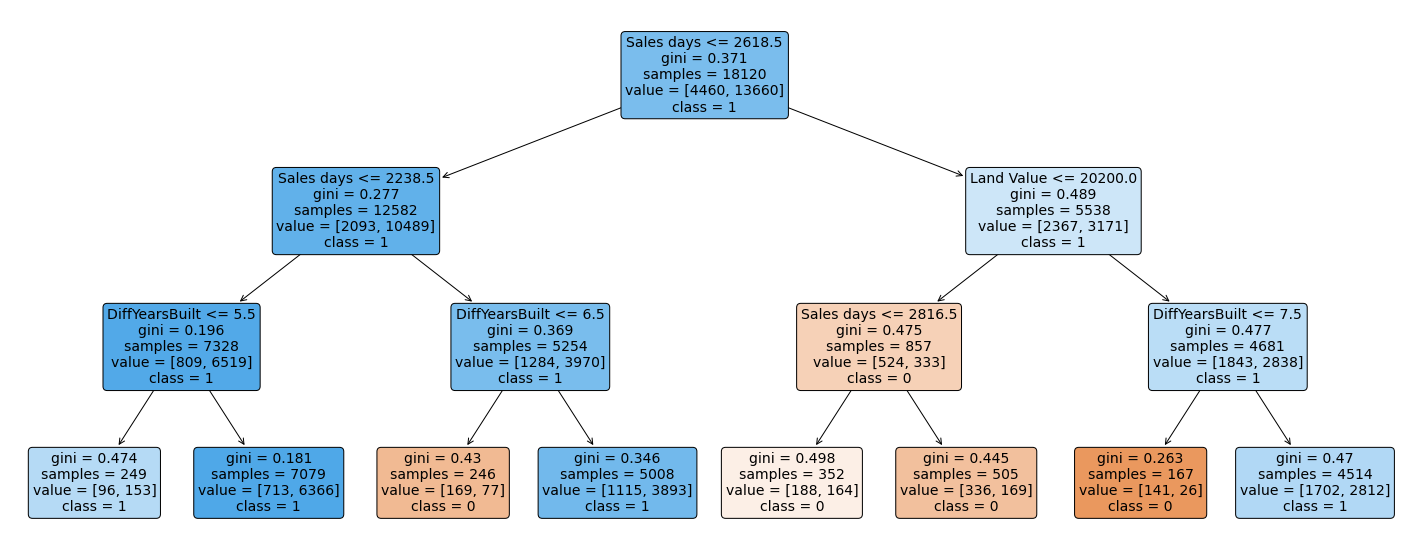

In [101]:
from sklearn import tree

treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(X_train,y_train)
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel,feature_names=X.columns.values.tolist(),class_names=['0','1'],filled=True,rounded=True,fontsize=14)



## Random Forest - Model 1

In [104]:
#Here we have used RandomizedSearchCV to hyperparameter tune our model
from sklearn.ensemble import RandomForestClassifier


In [106]:
# random forest tree model
rforest_model = RandomForestClassifier(n_estimators=1000,random_state=150)

rforest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=150)

In [107]:
y_pred = rforest_model.predict(X_test)

In [108]:
import sklearn.metrics as metrics

acc_rf = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the Random Forest Tree is', acc_rf)

The accuracy of the Random Forest Tree is 0.7839329066431251


In [109]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 382  762]
 [ 217 3170]]


In [110]:
#Cross-verify labels
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,382,762,1144
1,217,3170,3387
All,599,3932,4531


In [111]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8062054933875891


In [112]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.935931502804842


In [113]:
Log_Loss_RF1 = log_loss(y_test, y_pred)
print(Log_Loss_RF1)

7.4628274958859775


## Random Forest - Model 2

In [114]:
# random forest tree model
rforest_model = RandomForestClassifier(n_estimators=1500,random_state=150)

rforest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1500, random_state=150)

In [115]:
y_pred = rforest_model.predict(X_test)

In [116]:
import sklearn.metrics as metrics

acc_rf = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the Random Forest Tree is', acc_rf)

The accuracy of the Random Forest Tree is 0.7817258883248731


In [117]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8057113717491076


In [118]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9329790374963094


In [119]:
Log_Loss_RF2 = log_loss(y_test, y_pred)
print(Log_Loss_RF2)

7.539055208079557


## Gradient Boost - Model 1

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gbclass=GradientBoostingClassifier(random_state=0)
gbclass.fit(X_train,y_train)
gbypred=gbclass.predict(X_test)
gbclass.score(X_test, y_test)

0.7779739571838447

In [121]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [122]:
import sklearn.metrics as metrics

acc_xg = metrics.accuracy_score(gbypred, y_test)
print('The accuracy of the Random Forest Tree is', acc_xg)

The accuracy of the Random Forest Tree is 0.7779739571838447


In [123]:
#Cross-verify labels
pd.crosstab(y_test, gbypred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,297,847,1144
1,159,3228,3387
All,456,4075,4531


In [124]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.7734650670430487


In [125]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.970770593445527


In [126]:
Log_Loss_XG1 = log_loss(y_test, y_pred)
print(Log_Loss_XG1)

8.095552978088815


## Gradient Boost - Model 2

In [127]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

gb = GradientBoostingClassifier(n_estimators=30, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

acc_xg = metrics.accuracy_score(y_pred, y_test)
print('The accuracy of the Random Forest Tree is', acc_xg)

In [ ]:
#Cross-verify labels
pd.crosstab(y_test, gbypred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

In [ ]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
Log_Loss_XG2 = log_loss(y_test, y_pred)
print(Log_Loss_XG2)